In [1]:
import pandas as pd
import numpy as np
import cobra

In [2]:
# loading both datasets 
geo_df  = pd.read_csv("GSE50760_norm_counts_TPM_GRCh38.p13_NCBI.tsv", sep="\t", index_col=0)
tcga_df = pd.read_csv("TCGA-COAD.star_tpm.tsv.gz.tsv", sep="\t", index_col=0, compression="gzip")

## Data exploration

In [4]:
# Geo size 
print(geo_df.shape)

(39376, 54)


In [5]:
#TCGA size
print(tcga_df.shape)

(60660, 514)


In [6]:
# Data characteristics 
print (geo_df.dtypes)

GSM1228184    float64
GSM1228185    float64
GSM1228186    float64
GSM1228187    float64
GSM1228188    float64
GSM1228189    float64
GSM1228190    float64
GSM1228191    float64
GSM1228192    float64
GSM1228193    float64
GSM1228194    float64
GSM1228195    float64
GSM1228196    float64
GSM1228197    float64
GSM1228198    float64
GSM1228199    float64
GSM1228200    float64
GSM1228201    float64
GSM1228202    float64
GSM1228203    float64
GSM1228204    float64
GSM1228205    float64
GSM1228206    float64
GSM1228207    float64
GSM1228208    float64
GSM1228209    float64
GSM1228210    float64
GSM1228211    float64
GSM1228212    float64
GSM1228213    float64
GSM1228214    float64
GSM1228215    float64
GSM1228216    float64
GSM1228217    float64
GSM1228218    float64
GSM1228219    float64
GSM1228220    float64
GSM1228221    float64
GSM1228222    float64
GSM1228223    float64
GSM1228224    float64
GSM1228225    float64
GSM1228226    float64
GSM1228227    float64
GSM1228228    float64
GSM1228229

In [7]:
print (tcga_df.dtypes)

TCGA-5M-AAT6-01A    float64
TCGA-AA-3552-01A    float64
TCGA-AA-3867-01A    float64
TCGA-AD-6895-01A    float64
TCGA-AA-3560-01A    float64
                     ...   
TCGA-AZ-6601-01A    float64
TCGA-AA-3672-01A    float64
TCGA-AA-3524-01A    float64
TCGA-AA-3715-01A    float64
TCGA-AA-3531-01A    float64
Length: 514, dtype: object


In [8]:
print (geo_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39376 entries, 100287102 to 4571
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GSM1228184  39376 non-null  float64
 1   GSM1228185  39376 non-null  float64
 2   GSM1228186  39376 non-null  float64
 3   GSM1228187  39376 non-null  float64
 4   GSM1228188  39376 non-null  float64
 5   GSM1228189  39376 non-null  float64
 6   GSM1228190  39376 non-null  float64
 7   GSM1228191  39376 non-null  float64
 8   GSM1228192  39376 non-null  float64
 9   GSM1228193  39376 non-null  float64
 10  GSM1228194  39376 non-null  float64
 11  GSM1228195  39376 non-null  float64
 12  GSM1228196  39376 non-null  float64
 13  GSM1228197  39376 non-null  float64
 14  GSM1228198  39376 non-null  float64
 15  GSM1228199  39376 non-null  float64
 16  GSM1228200  39376 non-null  float64
 17  GSM1228201  39376 non-null  float64
 18  GSM1228202  39376 non-null  float64
 19  GSM1228203  39376 non-n

In [9]:
print (tcga_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60660 entries, ENSG00000000003.15 to ENSG00000288675.1
Columns: 514 entries, TCGA-5M-AAT6-01A to TCGA-AA-3531-01A
dtypes: float64(514)
memory usage: 238.3+ MB
None


## Data standarization 

In [11]:
# Convering GEO data to standard log2(x+1)
geo_df_log2 = np.log2(geo_df+1)

In [12]:
# Count total missing values
print("Missing values in GEO:", geo_df_log2.isnull().sum().sum())
print("Missing values in TCGA:", tcga_df.isnull().sum().sum())

Missing values in GEO: 0
Missing values in TCGA: 0


### Convert TCGA ensembl code to gene ID

In [14]:
print(tcga_df.head(2))

                    TCGA-5M-AAT6-01A  TCGA-AA-3552-01A  TCGA-AA-3867-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          4.783671          7.069015          7.627462   
ENSG00000000005.6           0.343692          0.753776          0.300417   

                    TCGA-AD-6895-01A  TCGA-AA-3560-01A  TCGA-CM-6676-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          4.079737          7.155694          7.634865   
ENSG00000000005.6           0.000000          2.463518          4.400080   

                    TCGA-AA-A029-01A  TCGA-AA-A01C-01A  TCGA-CK-5912-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          5.556540          7.008617          8.092381   
ENSG00000000005.6           1.449218          1.368768          1.881704   

                    TCGA-AA-A03F-01A  ...  TCGA-AD-6890-01A  TCGA-QL-A97D-01A  \
Ense

In [15]:
# Remove vesrion numbers .00
tcga_df.index = tcga_df.index.str.split('.').str[0]
print(tcga_df.head(2))

                 TCGA-5M-AAT6-01A  TCGA-AA-3552-01A  TCGA-AA-3867-01A  \
Ensembl_ID                                                              
ENSG00000000003          4.783671          7.069015          7.627462   
ENSG00000000005          0.343692          0.753776          0.300417   

                 TCGA-AD-6895-01A  TCGA-AA-3560-01A  TCGA-CM-6676-01A  \
Ensembl_ID                                                              
ENSG00000000003          4.079737          7.155694          7.634865   
ENSG00000000005          0.000000          2.463518          4.400080   

                 TCGA-AA-A029-01A  TCGA-AA-A01C-01A  TCGA-CK-5912-01A  \
Ensembl_ID                                                              
ENSG00000000003          5.556540          7.008617          8.092381   
ENSG00000000005          1.449218          1.368768          1.881704   

                 TCGA-AA-A03F-01A  ...  TCGA-AD-6890-01A  TCGA-QL-A97D-01A  \
Ensembl_ID                         ...     

In [16]:
# Mapping ensembl ID to gene ID such as BioMart
print (geo_df.head())

           GSM1228184  GSM1228185  GSM1228186  GSM1228187  GSM1228188  \
GeneID                                                                  
100287102     0.04069     0.04742        0.00      0.1232     0.08211   
653635       11.97000    23.12000       14.69     32.9000    25.65000   
102466751     6.91900     9.21700       11.11     32.9200    29.92000   
107985730     0.12490     0.00000        0.00      0.1261     0.00000   
100302278     0.00000     0.00000        0.00      0.0000     0.00000   

           GSM1228189  GSM1228190  GSM1228191  GSM1228192  GSM1228193  ...  \
GeneID                                                                 ...   
100287102      0.0397        0.00     0.08563      0.0529     0.06778  ...   
653635        22.8000       21.82    17.07000     32.2100    26.11000  ...   
102466751     33.7600       19.17     9.36200     19.2800    19.76000  ...   
107985730      0.0000        0.00     0.13150      0.1624     0.10410  ...   
100302278      0.000

In [17]:
# importing dataset from BioMart with gene ID, NCBI and gene name.
mapping_df = pd.read_csv("mart_export.txt", sep=",")
# Renaming for clarity
mapping_df.columns = ['Ensembl_ID', 'GeneID', 'Gene_Name']
print (mapping_df.head())

        Ensembl_ID  GeneID Gene_Name
0  ENSG00000210049     NaN     MT-TF
1  ENSG00000211459     NaN   MT-RNR1
2  ENSG00000210077     NaN     MT-TV
3  ENSG00000210082     NaN   MT-RNR2
4  ENSG00000209082     NaN    MT-TL1


In [18]:
# dropping entries without GeneID (Entrez number)
mapping_df = mapping_df.dropna(subset=["GeneID"])
print (mapping_df.head())

         Ensembl_ID       GeneID Gene_Name
5   ENSG00000198888       4535.0    MT-ND1
9   ENSG00000198763       4536.0    MT-ND2
15  ENSG00000198804       4512.0    MT-CO1
16  ENSG00000210151  113219467.0    MT-TS1
18  ENSG00000198712       4513.0    MT-CO2


In [19]:
# mergin with mapping to TCGA data 
tcga_mapped = pd.merge(tcga_df, mapping_df[['Ensembl_ID', 'GeneID']], on='Ensembl_ID')
# Set GeneID as index
tcga_mapped = tcga_mapped.set_index('GeneID')
print(tcga_mapped.head())

              Ensembl_ID  TCGA-5M-AAT6-01A  TCGA-AA-3552-01A  \
GeneID                                                         
7105.0   ENSG00000000003          4.783671          7.069015   
64102.0  ENSG00000000005          0.343692          0.753776   
8813.0   ENSG00000000419          6.679223          6.679985   
57147.0  ENSG00000000457          2.640366          2.605779   
55732.0  ENSG00000000460          2.678906          1.893168   

         TCGA-AA-3867-01A  TCGA-AD-6895-01A  TCGA-AA-3560-01A  \
GeneID                                                          
7105.0           7.627462          4.079737          7.155694   
64102.0          0.300417          0.000000          2.463518   
8813.0           7.430763          6.839957          6.019186   
57147.0          2.751292          3.088125          2.570706   
55732.0          2.264747          2.415056          2.718548   

         TCGA-CM-6676-01A  TCGA-AA-A029-01A  TCGA-AA-A01C-01A  \
GeneID                        

In [20]:
print(tcga_mapped.shape)

(29541, 515)


In [21]:
# Checking for common genes 
common_genes = geo_df.index.intersection(tcga_mapped.index)
common_genes

Index([102466751.0, 100302278.0,     79501.0, 102465909.0,    729759.0,
       113219467.0,     81399.0,    400728.0,    643837.0,    284593.0,
       ...
            4513.0,      4509.0,      4508.0,      4514.0,      4537.0,
            4539.0,      4538.0,      4540.0,      4541.0,      4519.0],
      dtype='float64', name='GeneID', length=25515)

In [22]:
# Convering dataset to int
common_genes = common_genes.astype(int)
geo_df.index = geo_df.index.astype(int)
tcga_mapped.index = tcga_mapped.index.astype(int)

In [23]:
# Subsetting by common genes 
geo_aligned = geo_df.loc[common_genes]
tcga_aligned = tcga_mapped.loc[common_genes]

In [24]:
print(geo_aligned.shape)
print(tcga_aligned.shape)

(25515, 54)
(25722, 515)


### Obtaining GEO metadata and mapping GEO data

In [26]:
with open("GSE50760_series_matrix.txt") as file:
    lines = file.readlines()

titles = [line for line in lines if line.startswith('!Sample_title')][0].split('\t')[1:]
accessions = [line for line in lines if line.startswith('!Sample_geo_accession')][0].split('\t')[1:]

# Cleaning up quotations 
titles = [title.strip().replace('"', '') for title in titles]
accessions = [acc.strip().replace('"', '') for acc in accessions]

# Make a DataFrame GSM ID and its description
import pandas as pd

sample_info = pd.DataFrame({
    'SampleID': accessions,
    'Description': titles
})

print(sample_info.head())

     SampleID                        Description
0  GSM1228184  primary colorectal cancer AMC_2-1
1  GSM1228185  primary colorectal cancer AMC_3-1
2  GSM1228186  primary colorectal cancer AMC_5-1
3  GSM1228187  primary colorectal cancer AMC_6-1
4  GSM1228188  primary colorectal cancer AMC_7-1


In [27]:
# Funtion for new labeling 
def label_geo(row):
    if 'normal' in row['Description'].lower():
        return f"GEO_Healthy_{row['SampleID']}"
    else:
        return f"GEO_Tumor_{row['SampleID']}"

sample_info['NewLabel'] = sample_info.apply(label_geo, axis=1)

print(sample_info.head())

     SampleID                        Description              NewLabel
0  GSM1228184  primary colorectal cancer AMC_2-1  GEO_Tumor_GSM1228184
1  GSM1228185  primary colorectal cancer AMC_3-1  GEO_Tumor_GSM1228185
2  GSM1228186  primary colorectal cancer AMC_5-1  GEO_Tumor_GSM1228186
3  GSM1228187  primary colorectal cancer AMC_6-1  GEO_Tumor_GSM1228187
4  GSM1228188  primary colorectal cancer AMC_7-1  GEO_Tumor_GSM1228188


In [28]:
# Dictionary with new label and id
mapping_dict = dict(zip(sample_info['SampleID'], sample_info['NewLabel']))

In [29]:
# Renaming GEO data
geo_labeled = geo_df.copy()
geo_labeled.rename(columns=mapping_dict, inplace= True)

In [30]:
print(geo_labeled.head())

           GEO_Tumor_GSM1228184  GEO_Tumor_GSM1228185  GEO_Tumor_GSM1228186  \
GeneID                                                                        
100287102               0.04069               0.04742                  0.00   
653635                 11.97000              23.12000                 14.69   
102466751               6.91900               9.21700                 11.11   
107985730               0.12490               0.00000                  0.00   
100302278               0.00000               0.00000                  0.00   

           GEO_Tumor_GSM1228187  GEO_Tumor_GSM1228188  GEO_Tumor_GSM1228189  \
GeneID                                                                        
100287102                0.1232               0.08211                0.0397   
653635                  32.9000              25.65000               22.8000   
102466751               32.9200              29.92000               33.7600   
107985730                0.1261               0.000

### Renaming TCGA data

In [32]:
# Relabeling function
def label_tcga(col):
    try:
        parts = col.split('-')
        if len(parts) < 4:
            return f"TCGA_Unknown_{col}"
        sample_code = parts[3][:2]
        condition = "Tumor" if sample_code == "01" else "Healthy" if sample_code == "11" else "Other"
        patient_id = parts[2]  
        return f"TCGA_{condition}_{patient_id}"
    except:
        return f"TCGA_Unknown_{col}"

In [33]:
tcga_labeled = tcga_mapped.copy()
tcga_labeled.columns = [label_tcga(col) for col in tcga_labeled.columns]

In [34]:
print (tcga_labeled.head())

       TCGA_Unknown_Ensembl_ID  TCGA_Tumor_AAT6  TCGA_Tumor_3552  \
GeneID                                                             
7105           ENSG00000000003         4.783671         7.069015   
64102          ENSG00000000005         0.343692         0.753776   
8813           ENSG00000000419         6.679223         6.679985   
57147          ENSG00000000457         2.640366         2.605779   
55732          ENSG00000000460         2.678906         1.893168   

        TCGA_Tumor_3867  TCGA_Tumor_6895  TCGA_Tumor_3560  TCGA_Tumor_6676  \
GeneID                                                                       
7105           7.627462         4.079737         7.155694         7.634865   
64102          0.300417         0.000000         2.463518         4.400080   
8813           7.430763         6.839957         6.019186         8.255367   
57147          2.751292         3.088125         2.570706         3.005328   
55732          2.264747         2.415056         2.7185

## Merging TCGA and GEO

In [36]:
# Dropping duplicates before merging
print(geo_labeled.index.duplicated().sum())     
print(tcga_labeled.index.duplicated().sum())    

0
2493


In [37]:
# Dropping dupplicates for tcga keeping only the first apperance 
tcga_labeled = tcga_labeled[~tcga_labeled.index.duplicated(keep='first')]
print(tcga_labeled.index.duplicated().sum())    

0


In [38]:
# Merging datasets 
combined_df = pd.concat([geo_labeled, tcga_labeled], axis=1)

In [39]:
print (combined_df.shape)

(40909, 569)


In [40]:
print(combined_df.index.duplicated().sum())  

0


In [41]:
columns_with_na = combined_df.isna().any()
print("Columns containing NA values:\n", columns_with_na)

Columns containing NA values:
 GEO_Tumor_GSM1228184    True
GEO_Tumor_GSM1228185    True
GEO_Tumor_GSM1228186    True
GEO_Tumor_GSM1228187    True
GEO_Tumor_GSM1228188    True
                        ... 
TCGA_Tumor_6601         True
TCGA_Tumor_3672         True
TCGA_Tumor_3524         True
TCGA_Tumor_3715         True
TCGA_Tumor_3531         True
Length: 569, dtype: bool


In [42]:
combined_df_filled = combined_df.fillna(0)
columns_with_na = combined_df_filled.isna().any()
print("Columns containing NA values:\n", columns_with_na)

Columns containing NA values:
 GEO_Tumor_GSM1228184    False
GEO_Tumor_GSM1228185    False
GEO_Tumor_GSM1228186    False
GEO_Tumor_GSM1228187    False
GEO_Tumor_GSM1228188    False
                        ...  
TCGA_Tumor_6601         False
TCGA_Tumor_3672         False
TCGA_Tumor_3524         False
TCGA_Tumor_3715         False
TCGA_Tumor_3531         False
Length: 569, dtype: bool


## Spliting Healthy from Trumour into two datasets and then applying median 

In [44]:
# spliting by column name 
tumor_df   = combined_df_filled.loc[:, combined_df_filled.columns.str.contains("Tumor")]
healthy_df = combined_df_filled.loc[:, combined_df_filled.columns.str.contains("Healthy")]

In [45]:
print("Tumor shape:", tumor_df.shape)
print("Healthy shape:", healthy_df.shape)

Tumor shape: (40909, 507)
Healthy shape: (40909, 59)


In [46]:
# saving data for future handling 
tumor_df.to_csv("tumor_expression_matrix.csv")
healthy_df.to_csv("healthy_expression_matrix.csv")

In [47]:
# Single vector for Tumor and Healthy
tumor_median   = tumor_df.median(axis=1)
healthy_median = healthy_df.median(axis=1)

(array([2.3846e+04, 1.0730e+03, 7.7800e+02, 5.5800e+02, 5.0500e+02,
        4.3300e+02, 3.8600e+02, 3.5300e+02, 3.2500e+02, 3.0600e+02,
        2.7000e+02, 2.7100e+02, 2.9600e+02, 2.7400e+02, 2.9600e+02,
        2.9000e+02, 3.2700e+02, 3.4000e+02, 3.0800e+02, 3.2100e+02,
        3.7800e+02, 3.5500e+02, 4.0500e+02, 4.1900e+02, 3.9400e+02,
        4.0200e+02, 4.4300e+02, 4.3900e+02, 4.2700e+02, 4.2200e+02,
        4.0900e+02, 3.9800e+02, 4.2600e+02, 3.7300e+02, 3.4000e+02,
        3.1500e+02, 3.1000e+02, 2.5400e+02, 2.4400e+02, 2.7600e+02,
        2.2100e+02, 1.8800e+02, 1.8200e+02, 1.4300e+02, 1.4300e+02,
        1.1800e+02, 1.2000e+02, 1.0800e+02, 9.7000e+01, 6.9000e+01,
        6.1000e+01, 5.9000e+01, 5.0000e+01, 3.9000e+01, 3.4000e+01,
        3.5000e+01, 3.9000e+01, 3.0000e+01, 2.1000e+01, 1.4000e+01,
        1.7000e+01, 1.1000e+01, 1.5000e+01, 7.0000e+00, 1.2000e+01,
        9.0000e+00, 1.0000e+01, 1.1000e+01, 8.0000e+00, 5.0000e+00,
        7.0000e+00, 5.0000e+00, 4.0000e+00, 5.00

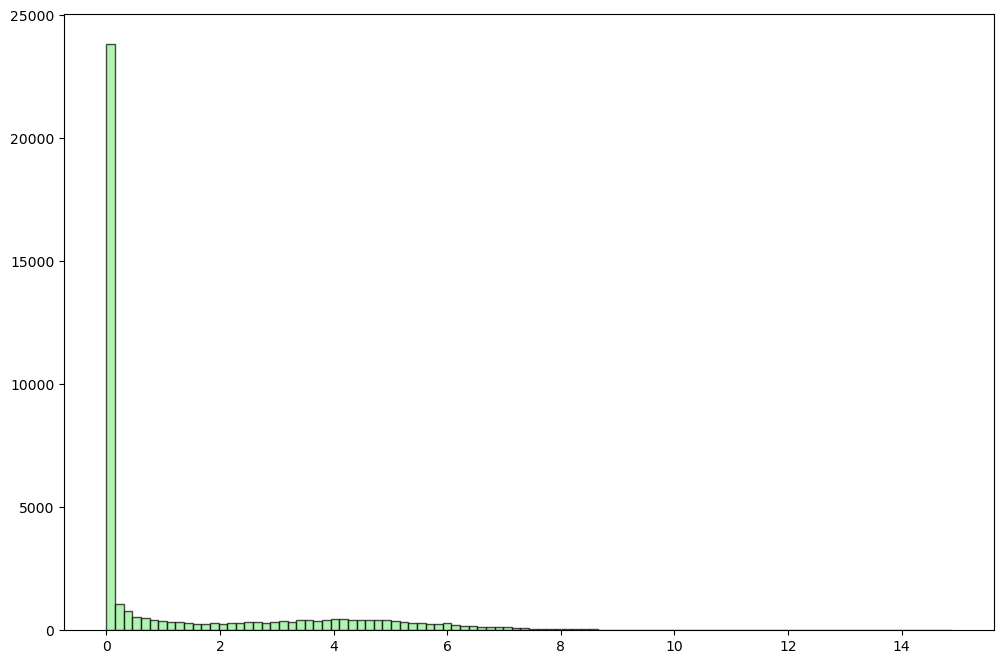

In [48]:
# Values of distributions 
import matplotlib.pyplot as plt

#Tumor data
plt.figure(figsize=(12, 8))
plt.hist(tumor_median, bins='auto', alpha=0.7, color='lightgreen', edgecolor='black')

(array([2.3699e+04, 1.1540e+03, 7.5300e+02, 5.7000e+02, 4.9400e+02,
        4.2000e+02, 3.8200e+02, 3.5200e+02, 3.1300e+02, 3.0400e+02,
        3.0200e+02, 2.8400e+02, 3.2400e+02, 2.8600e+02, 3.0000e+02,
        3.0400e+02, 3.2100e+02, 3.6000e+02, 3.1900e+02, 3.7100e+02,
        3.2000e+02, 3.5700e+02, 3.6300e+02, 3.7600e+02, 3.8700e+02,
        3.5700e+02, 4.1000e+02, 4.0000e+02, 4.0200e+02, 3.8400e+02,
        3.8100e+02, 3.7300e+02, 3.6300e+02, 3.8000e+02, 3.5500e+02,
        3.3100e+02, 2.9900e+02, 3.0300e+02, 2.6500e+02, 2.3600e+02,
        2.3600e+02, 2.0200e+02, 1.8200e+02, 1.6300e+02, 1.4700e+02,
        1.1300e+02, 1.3500e+02, 1.3200e+02, 1.0200e+02, 9.8000e+01,
        1.0000e+02, 6.6000e+01, 5.7000e+01, 5.1000e+01, 5.9000e+01,
        4.1000e+01, 4.0000e+01, 4.2000e+01, 2.9000e+01, 2.4000e+01,
        1.8000e+01, 2.1000e+01, 1.6000e+01, 3.1000e+01, 2.5000e+01,
        1.4000e+01, 1.0000e+01, 3.0000e+00, 1.2000e+01, 9.0000e+00,
        6.0000e+00, 7.0000e+00, 7.0000e+00, 4.00

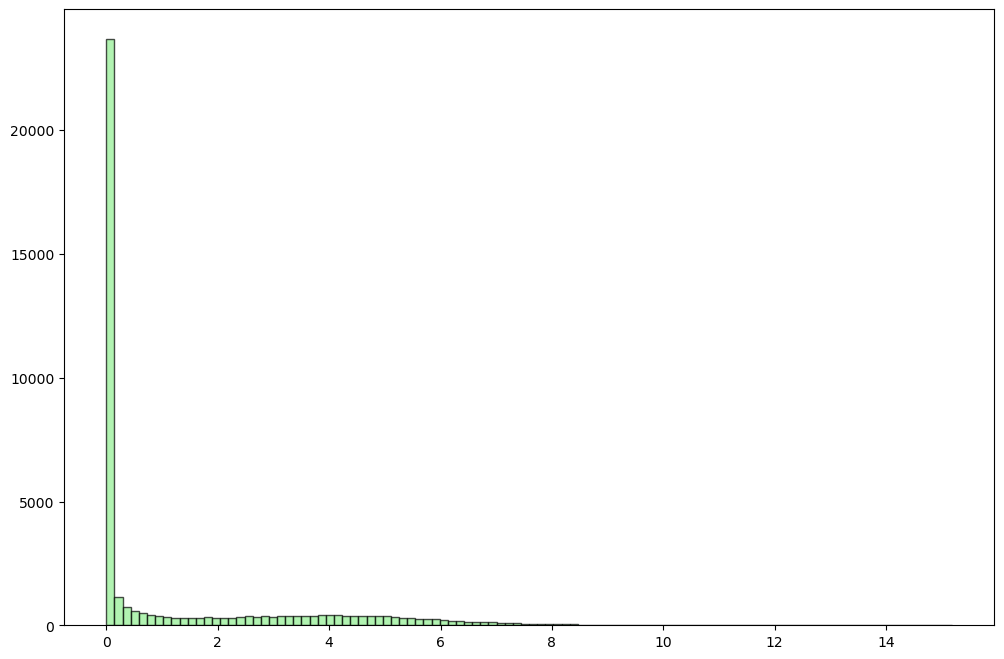

In [49]:
# Healthy data 
plt.figure(figsize=(12, 8))
plt.hist(healthy_median, bins='auto', alpha=0.7, color='lightgreen', edgecolor='black')

## GEM model

In [51]:
from cobra.io import read_sbml_model

gem_model = read_sbml_model("Human-GEM.xml") 

In [53]:
# Model 
print(gem_model)
print(f"Reactions: {len(gem_model.reactions)}")
print(f"Genes: {len(gem_model.genes)}")

HumanGEM
Reactions: 12971
Genes: 2887


## Exporting data to use use it in Matlab

In [56]:
tumor_median.to_csv("tumor_median_matrix.csv")
healthy_median.to_csv("healthy_median_matrix.csv")